<a href="https://colab.research.google.com/github/nadaaltalea/world-happiness-analysis/blob/main/WorldHappiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Dataset Loading**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

#import dataset
file_path = "/content/drive/MyDrive/2019.csv"
df = pd.read_csv(file_path)

#display first 5 rowes
df.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# **2. Descriptive Analysis**

In [4]:
# Information about data

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
# Descriptive Statistics

df.describe()


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [6]:
# Missing Values

df.isnull().sum()


,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


# **3. Outliers Detection**

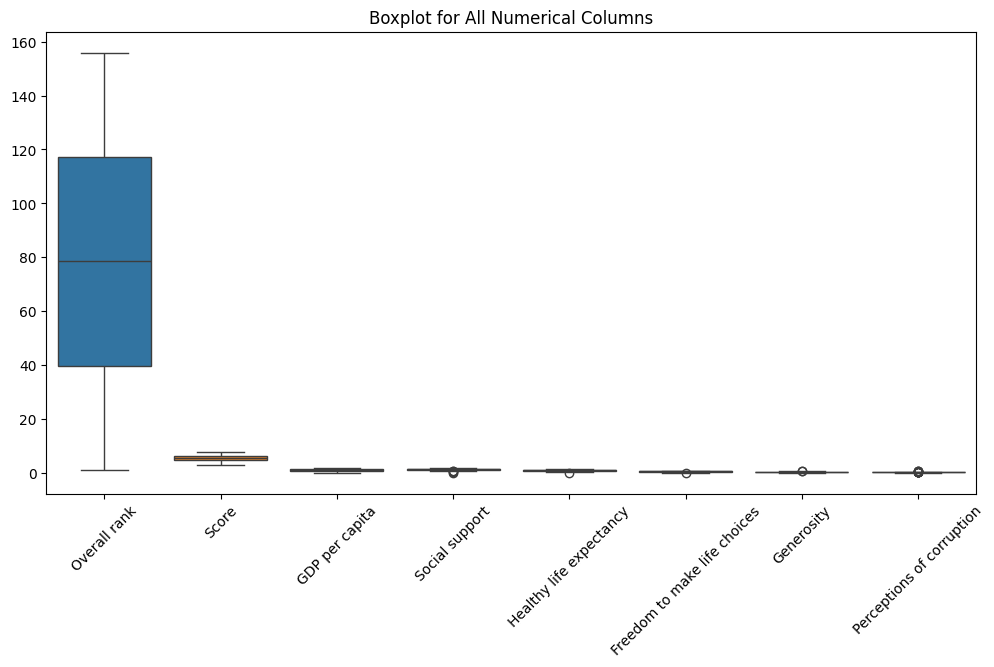

In [7]:
# Boxplot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Boxplot for All Numerical Columns")
plt.xticks(rotation=45)
plt.show()


# 4. Data Visualization

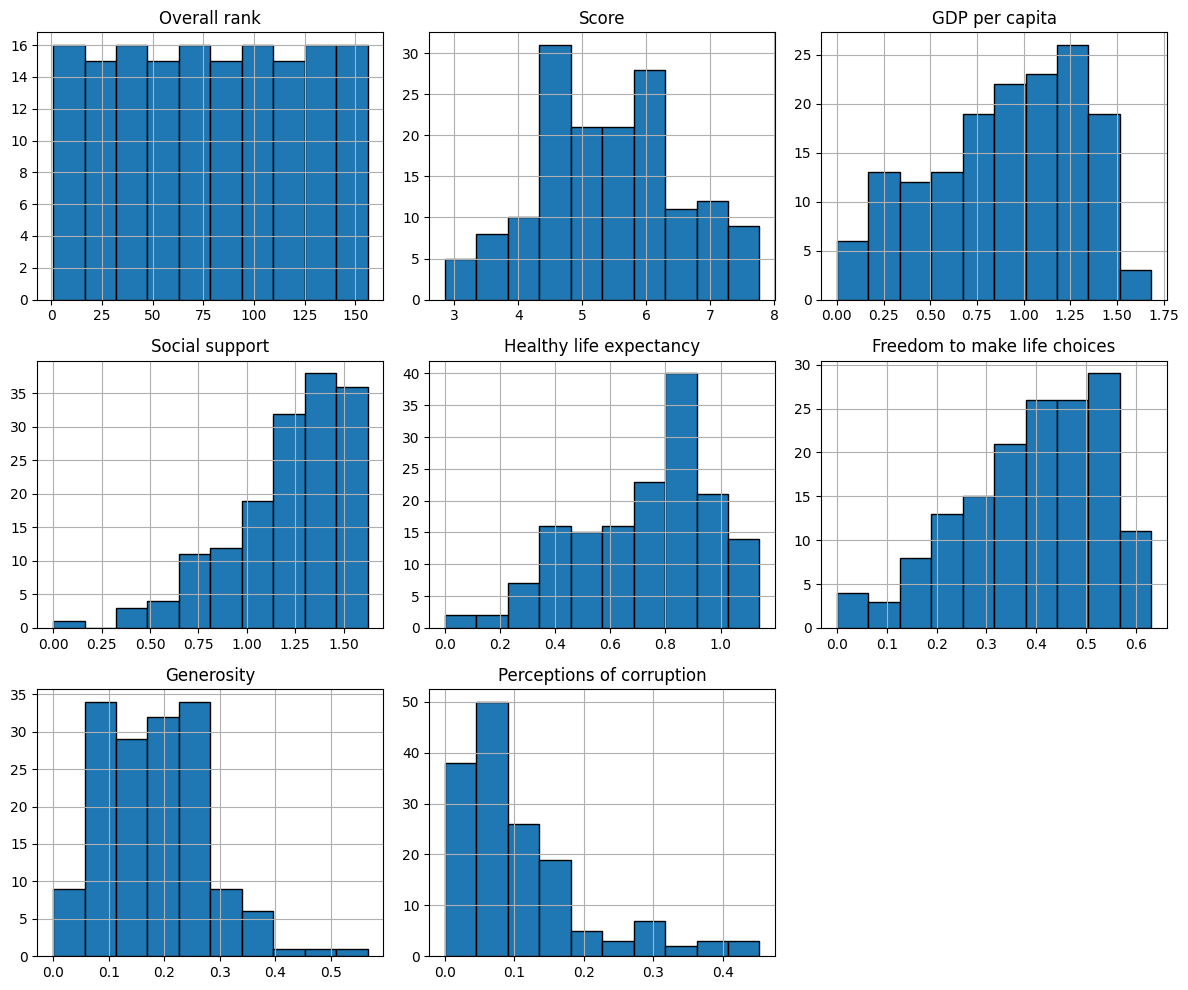

In [8]:
# 1.Histogram

import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=10, edgecolor='black')
plt.tight_layout()
plt.show()


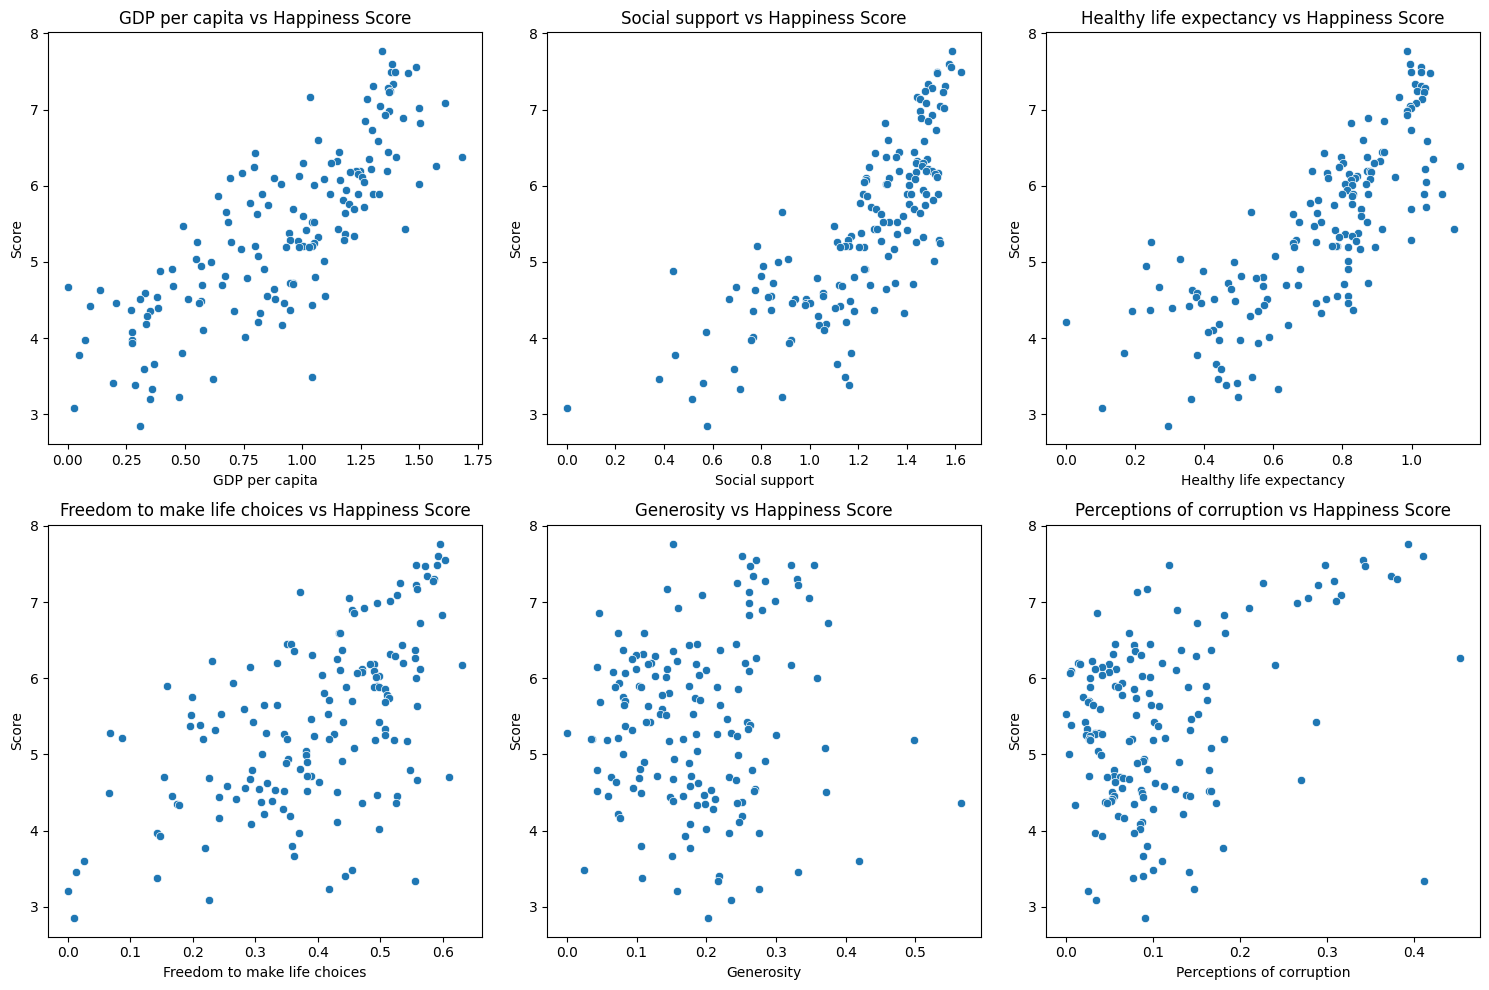

In [9]:
# 2. Scatter Plots with Happiness Score

import seaborn as sns
import matplotlib.pyplot as plt

features = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df[col], y=df['Score'])
    plt.title(f"{col} vs Happiness Score")
plt.tight_layout()
plt.show()


# **5. Correlation Analysis**

In [11]:

numeric_df = df.select_dtypes(include=['number'])
numeric_df.head()


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [12]:
# 1. Correlation Matrix

corr_matrix = numeric_df.corr()
corr_matrix


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


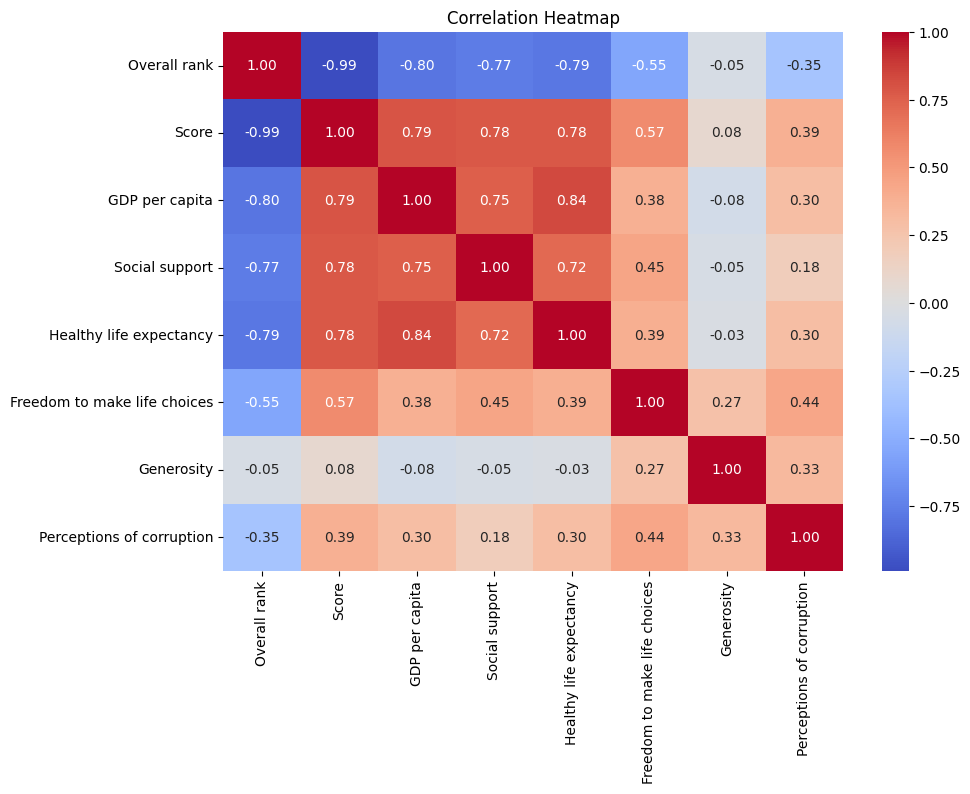

In [13]:
# 2. Heatmap

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# **6. Linear Regression Model**

In [18]:
# 1. Preparing the Features and Target Variable

X = df[['GDP per capita',
        'Social support',
        'Healthy life expectancy',
        'Freedom to make life choices',
        'Generosity',
        'Perceptions of corruption']]

y = df['Score']


In [19]:
# 2. Splitting the Dataset into Training and Testing Sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% للاختبار
    random_state=42     # نختار رقم ثابت  ليعطينا نتيجة ثابتة
)


In [20]:
# 3. Training the Linear Regression Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [21]:
# 4. Extracting the Model Coefficients and Intercept

print("Intercept:", model.intercept_)
print("Coefficients:")

for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef}")


Intercept: 1.8115122981234268
Coefficients:
GDP per capita: 0.7507165994794487
Social support: 1.232324717967172
Healthy life expectancy: 0.930944844928188
Freedom to make life choices: 1.4898133491546761
Generosity: 0.27037842444890214
Perceptions of corruption: 1.11243118133487


# **7. Model Evaluation**

In [22]:
# 1. Generating Predictions

y_pred = model.predict(X_test)


In [23]:
# 2. Calculating Model Evaluation Metrics (R², MAE, RMSE)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


R2 Score: 0.6017537913445683
MAE: 0.495462022879975
RMSE: 0.6437888926914126


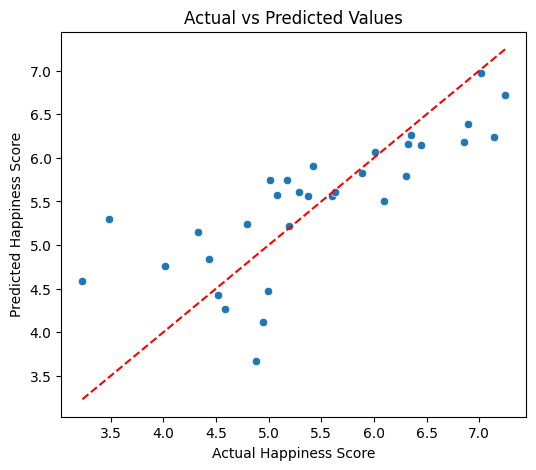

In [24]:
# 3. Plotting Actual vs. Predicted Values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--', color='red')
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual vs Predicted Values")
plt.show()
